## Setup

In [39]:
# Import Gymnasium
import gymnasium as gym

# Import Wrappers
from gymnasium.wrappers import GrayScaleObservation # Wrapper to convert RGB image to grayscale
from stable_baselines3.common.vec_env import VecFrameStack, DummyVecEnv # VecFrameStack is a wrapper that stacks the last n frames

# Import Algorithms for Training
from stable_baselines3 import PPO # Proximal Policy Optimization (PPO) algorithm

# Additional Imports
import os # File management
from stable_baselines3.common.callbacks import BaseCallback # Callbacks for saving models
from matplotlib import pyplot as plt

In [40]:
# Custom class to make saving models easier
class TrainAndLoggingCallback(BaseCallback):

  def __init__(self, check_freq, save_path, verbose=1):
    super(TrainAndLoggingCallback, self).__init__(verbose)
    self.check_freq = check_freq
    self.save_path = save_path

  def _init_callback(self):
    if self.save_path is not None:
      os.makedirs(self.save_path, exist_ok=True)

  def _on_step(self):
    if self.n_calls % self.check_freq == 0:
      model_path = os.path.join(self.save_path, 'best_model_{}'.format(self.n_calls))
      self.model.save(model_path)

    return True

In [41]:
CHECKPOINT_DIR = 'checkpoints' # Directory to save models
LOG_DIR = 'logs'

## Model Initialization

In [ ]:
# Define model parameters
game = "ALE/SpaceInvaders-v5"
# game = "ALE/Tetris-v5"

learning_rate = 0.000001
model_memory = 4




# Create the environment, and appy all wrappers
env = gym.make(game)
env = GrayScaleObservation(env, keep_dim=True)                # Grayscale Wrapper to reduce the number of features
env = DummyVecEnv([lambda: env])                              # Wrapper to vectorize the environment (allows for multiple parallel environments)
env = VecFrameStack(env, model_memory, channels_order='last') # FrameStack Wrapper to remember the last n frames

# Initializes the environment and returns the initial observation
init_obs = env.reset()

# Setup model saving
callback = TrainAndLoggingCallback(check_freq=10000, save_path=CHECKPOINT_DIR)

# Initialize the model
model = PPO('CnnPolicy', env, verbose=1, learning_rate=learning_rate, tensorboard_log=LOG_DIR, n_steps=512)

## Testing

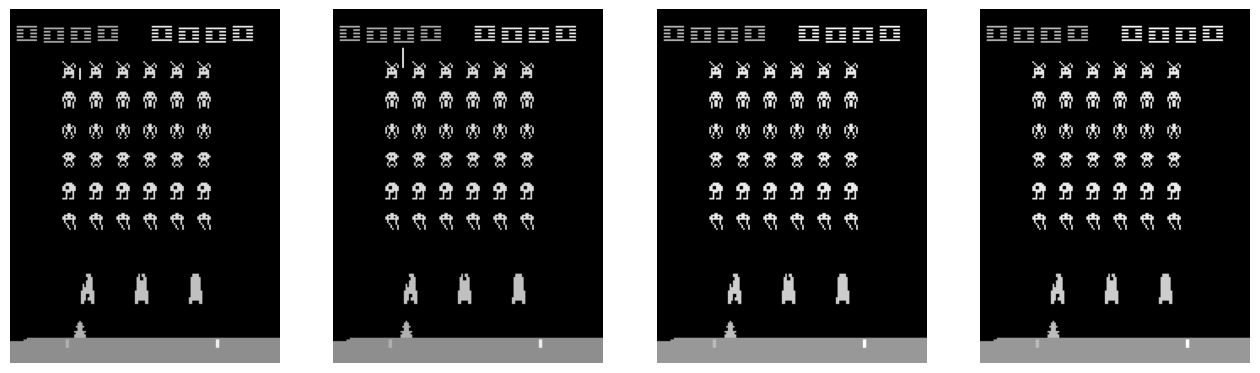

In [36]:
num_stacks = 4 # number of recent frames to keep in memory for the agent to use

### Setup Environment
# Create the base game environment
env = gym.make("ALE/SpaceInvaders-v5")
# env = gym.make("ALE/Tetris-v5")

# Grayscale Wrapper to reduce the number of features
env = GrayScaleObservation(env, keep_dim=True)

# Wrapper to vectorize the environment (allows for multiple parallel environments)
env = DummyVecEnv([lambda: env])

# FrameStack Wrapper to stack the last n frames
env = VecFrameStack(env, num_stacks, channels_order='last')


# Resets (initializes) the environment and returns the initial observation
init_obs = env.reset()

# Takes a couple random actions
num_actions = 100
for _ in range(num_actions):
  # decides what to do for the current action
  action = env.action_space.sample()
  # Takes the current action in the environment
  next_obs, rewards, dones, infos = env.step([action]) # method expects an array as input (with a batch size corresponding to the number of environments)



# print(init_obs.shape) # (1, 210, 160, num_stacks)
# Visualize the most recent frame
# plt.imshow(next_obs[0, :, :, num_stacks - 1], cmap='gray')

# Visualize the last 'num_stacks' frames
plt.figure(figsize=(16, 8))
for i in range(num_stacks):
  plt.subplot(1, num_stacks, i + 1)
  plt.imshow(next_obs[0, :, :, i], cmap='gray')
  plt.axis('off')


env.close()